# Linear SVM

## Getting the data

In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [3]:
# standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## The algorithm itself

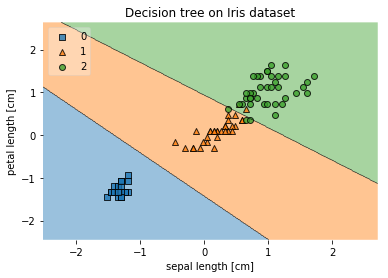

In [28]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

import my_plotter
my_plotter.plot_regions(x=X_train_std, y=y_train, clsf=svm,
                     xl=my_plotter.iris_xl, yl=my_plotter.iris_yl, tit='Decision tree on Iris dataset')

# Non-linear problems with SVM

## Generating the dataset

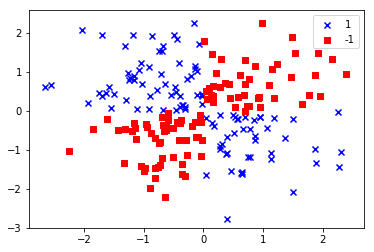

In [16]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

## Trying RBF kernel on this case

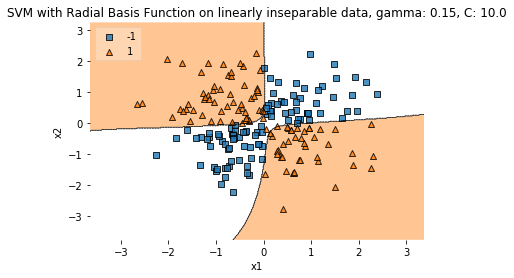

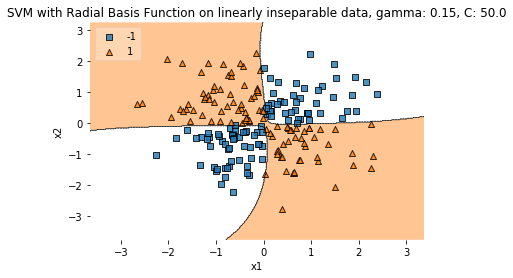

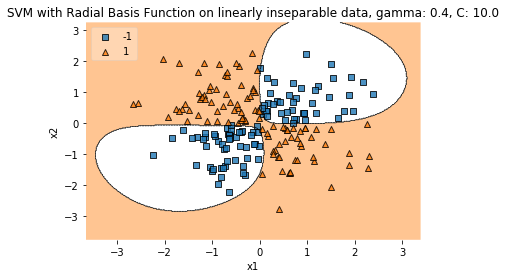

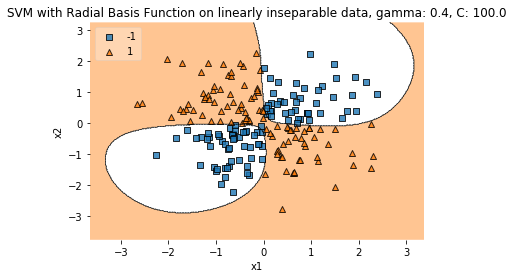

In [29]:
def svm_rbf_wrapper(gamma, c):
    svm = SVC(kernel='rbf', random_state=0, gamma=gamma, C=c)
    svm.fit(X_xor, y_xor)

    import my_plotter
    my_plotter.plot_regions(x=X_xor, y=y_xor, clsf=svm,
                            xl='x1', yl='x2',
                            tit='SVM with Radial Basis Function on linearly inseparable data, gamma: {}, C: {}'.format(gamma, c))
    
svm_rbf_wrapper(gamma=0.15, c=10.0)
svm_rbf_wrapper(gamma=0.15, c=50.0)
svm_rbf_wrapper(gamma=0.4, c=10.0)
svm_rbf_wrapper(gamma=0.4, c=100.0)